In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
hdsd = pd.read_csv('../stroke.csv')

In [3]:
hdsd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
hdsd = hdsd.drop(['id'],axis=1)

In [5]:
len(hdsd)

5110

In [6]:
for i in hdsd.columns:
    op = hdsd[i].isna().sum()
    length = len(hdsd)
    print("{}".format(i), "{}".format(op/length)) 

gender 0.0
age 0.0
hypertension 0.0
heart_disease 0.0
ever_married 0.0
work_type 0.0
Residence_type 0.0
avg_glucose_level 0.0
bmi 0.03933463796477495
smoking_status 0.0
stroke 0.0


In [7]:
hdsd['bmi'].isna().sum()

201

In [8]:
hdsd['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
import numpy as np
hdsd['bmi'].mode()

0    28.7
dtype: float64

In [10]:
hdsd['bmi'] = hdsd['bmi'].fillna(28.7)

In [11]:
len(hdsd[hdsd['stroke']==1])

249

In [12]:
hdsd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# Analysis of all categorical variables
print('Gender')
print(hdsd['gender'].value_counts())
print("***********************")
print('Work Type')
print(hdsd['work_type'].value_counts())
print("***********************")
print('Residence Type')
print(hdsd['Residence_type'].value_counts())
print("***********************")
print('Smoking Status')
print(hdsd['smoking_status'].value_counts())
print("***********************")

Gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
***********************
Work Type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
***********************
Residence Type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
***********************
Smoking Status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
***********************


In [14]:
one_hot_encoded_data = pd.get_dummies(hdsd, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'])
one_hot_encoded_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.7,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.7,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
one_hot_encoded_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.7,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.7,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [17]:
stroke_one = hdsd[hdsd['stroke']==1]


In [18]:
stroke_one.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Lets look at all continuous variables
1.Age

2.Avg_glucose_level

3.BMI

In [19]:
features = ["age", "avg_glucose_level", "bmi"]

hdsd[features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.885636,7.698109,10.30,23.800,28.400,32.80,97.60


In [20]:
hdsd[(hdsd['age']<10) & (hdsd['stroke']==1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.7,Unknown,1


<AxesSubplot:ylabel='gender'>

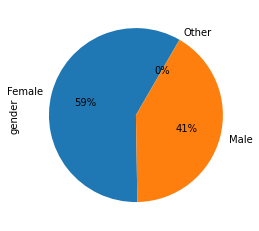

In [21]:
hdsd['gender'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=60)

<AxesSubplot:ylabel='work_type'>

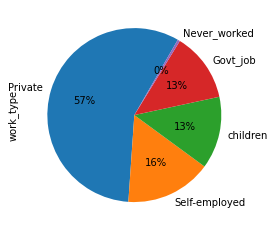

In [22]:
hdsd['work_type'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=60)

<AxesSubplot:ylabel='Residence_type'>

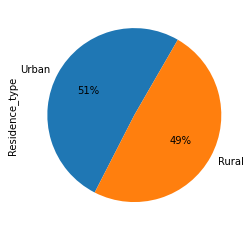

In [23]:
hdsd['Residence_type'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=60)

<AxesSubplot:ylabel='smoking_status'>

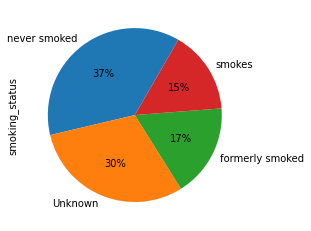

In [24]:
# colors = colors=colors
hdsd['smoking_status'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=60)

In [25]:
features = ["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"]

hdsd[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,5110.000000,28.885636,7.698109,10.300000,23.800000,28.400000,32.800000,97.600000


In [26]:
hdsd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
Age = hdsd['age'].astype(int)
rate = []
for i in range(Age.min(), Age.max()):
    rate.append(hdsd[Age < i]['stroke'].sum() / len(hdsd[Age < i]['stroke']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


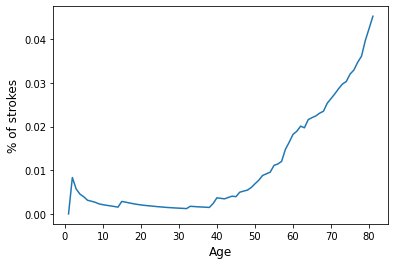

In [28]:
import matplotlib.pylab as plt
plt.plot(rate)
plt.xlabel('Age', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

In [29]:
bmi = hdsd['bmi'].astype(int)
rate_BMI = []
for i in range(bmi.min(), bmi.max()):
    rate_BMI.append(hdsd[bmi < i]['stroke'].sum() / len(hdsd[bmi < i]['stroke']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


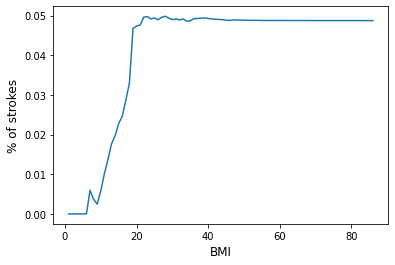

In [30]:
import matplotlib.pylab as plt
plt.plot(rate_BMI)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

In [31]:
avg_glucose = hdsd['avg_glucose_level'].astype(int)
rate_glucose = []
for i in range(bmi.min(), bmi.max()):
    rate_glucose.append(hdsd[avg_glucose < i]['stroke'].sum() / len(hdsd[avg_glucose < i]['stroke']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


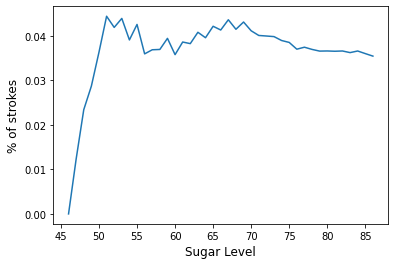

In [32]:
import matplotlib.pylab as plt
plt.plot(rate_glucose)
plt.xlabel('Sugar Level', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

In [33]:
one_hot_encoded_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.7,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.7,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [34]:
stroke = one_hot_encoded_data['stroke']
one_hot_encoded_data_copy = one_hot_encoded_data
one_hot_encoded_data = one_hot_encoded_data.drop(['stroke'],axis = 1)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, stroke, test_size=0.33, random_state=42)

In [36]:
X_train.drop('work_type_Never_worked',1,inplace=True)
X_test.drop('work_type_Never_worked',1,inplace=True)
X_train.shape

(3423, 21)

In [37]:
X_test.shape

(1687, 21)

In [38]:
y_train.shape

(3423,)

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test,clf.predict(X_test)))

ACCURACY OF THE MODEL:  0.941315945465323


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test,tree.predict(X_test)))

pickle.dump(tree, open(r"C:\Users\Acer\Downloads\Project 2\models\strock.pkl", 'wb'))
clf = pickle.load(open("strock.pkl", 'rb'))
pred = list(clf.predict(X_test))
print(accuracy_score(y_test,pred))
a = pd.concat([X_test,y_test],axis=1)
final = a[a.stroke==1].reset_index(drop=True)
final.to_csv('check_strocks.csv',index=False)